<a href="https://colab.research.google.com/github/Anubhav16Singh/MLproj/blob/main/Classification_using_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Define paths
dataset_path = '/content/drive/My Drive/garbage_classification'
train_dir = '/content/garbage_classification/train'
val_dir = '/content/garbage_classification/validation'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)


class_names = os.listdir(dataset_path)

# Function to copy files
def copy_files(image_list, src_dir, dst_dir):
    for image in tqdm(image_list, desc=f'Copying to {dst_dir}'):
        src = os.path.join(src_dir, image)
        dst = os.path.join(dst_dir, image)
        shutil.copy(src, dst)

# Split dataset into train and validation
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        # Create directories for each class in train and validation
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        all_images = os.listdir(class_path)
        train_images, val_images = train_test_split(all_images, test_size=0.2, random_state=42)


        copy_files(train_images, class_path, os.path.join(train_dir, class_name))
        copy_files(val_images, class_path, os.path.join(val_dir, class_name))


num_classes = len(class_names)
print("Number of classes:", num_classes)


Copying to /content/garbage_classification/train/white-glass: 100%|██████████| 620/620 [00:05<00:00, 121.32it/s]
Copying to /content/garbage_classification/validation/white-glass: 100%|██████████| 155/155 [00:00<00:00, 327.76it/s]
Copying to /content/garbage_classification/train/paper: 100%|██████████| 840/840 [00:07<00:00, 108.43it/s]
Copying to /content/garbage_classification/validation/paper: 100%|██████████| 210/210 [00:00<00:00, 343.57it/s]
Copying to /content/garbage_classification/train/clothes: 100%|██████████| 4260/4260 [01:15<00:00, 56.67it/s] 
Copying to /content/garbage_classification/validation/clothes: 100%|██████████| 1065/1065 [00:03<00:00, 328.13it/s]
Copying to /content/garbage_classification/train/cardboard: 100%|██████████| 712/712 [00:06<00:00, 104.81it/s]
Copying to /content/garbage_classification/validation/cardboard: 100%|██████████| 179/179 [00:00<00:00, 275.44it/s]
Copying to /content/garbage_classification/train/plastic: 100%|██████████| 591/591 [00:04<00:00,

Number of classes: 12


In [ ]:

from tensorflow.keras.utils import image_dataset_from_directory
#train_data=image_dataset_from_directory(data_dir)
image_height = 256
batch_size=32
train_dir = image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 15409 files belonging to 12 classes.
Using 12328 files for training.


In [ ]:
class_names = train_dir.class_names
print(class_names)
len(class_names)


['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


12

In [ ]:
val_dir = image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 15409 files belonging to 12 classes.
Using 3081 files for validation.


In [ ]:
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Flatten, Dense

resnet_model = Sequential()

pretrained_model= ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',
                   classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
epochs=15
history = resnet_model.fit(
  train_dir,
  validation_data = val_dir,
  epochs=epochs
)


Epoch 1/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 93s 198ms/step - accuracy: 0.8389 - loss: 0.5613 - val_accuracy: 0.9224 - val_loss: 0.2475
Epoch 2/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 117s 157ms/step - accuracy: 0.9491 - loss: 0.1493 - val_accuracy: 0.9286 - val_loss: 0.2376
Epoch 3/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 72s 188ms/step - accuracy: 0.9690 - loss: 0.0849 - val_accuracy: 0.9396 - val_loss: 0.1949
Epoch 4/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 71s 160ms/step - accuracy: 0.9784 - loss: 0.0584 - val_accuracy: 0.9315 - val_loss: 0.2316
Epoch 5/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 90s 181ms/step - accuracy: 0.9892 - loss: 0.0363 - val_accuracy: 0.9390 - val_loss: 0.2153
Epoch 6/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 84s 185ms/step - accuracy: 0.9913 - loss: 0.0244 - val_accuracy: 0.9458 - val_loss: 0.2252
Epoch 7/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 71s 158ms/step - accuracy: 0.9838 - loss: 0.0504 - val_accuracy: 0.9422 - val_loss: 0.2320
Epoch 8/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 71s 183ms/step - accuracy: 0.9903 - loss: 

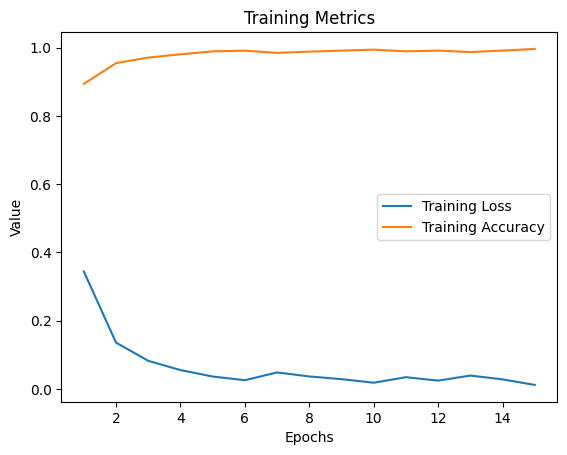

In [ ]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

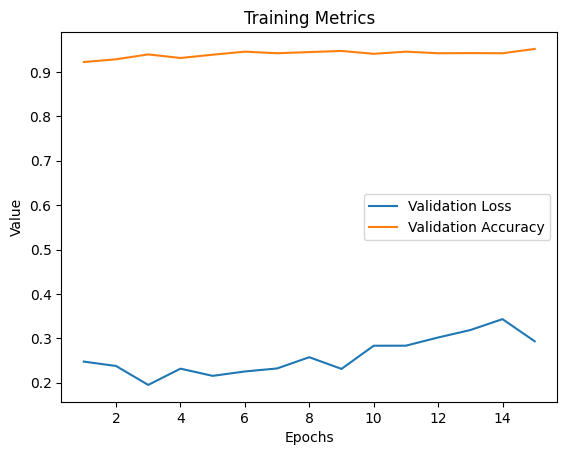

In [ ]:
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
import cv2
def predict_img(fpath):

    image=cv2.imread(fpath)
    example = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(example)
    image_resized= cv2.resize(image, (image_height,image_height))
    image=np.expand_dims(image_resized,axis=0)
    pred=resnet_model.predict(image)
    output=class_names[np.argmax(pred)]
    print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
clothes


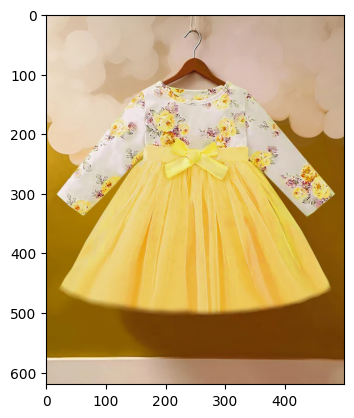

In [ ]:
predict_img('/content/drive/My Drive/hii.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
cardboard


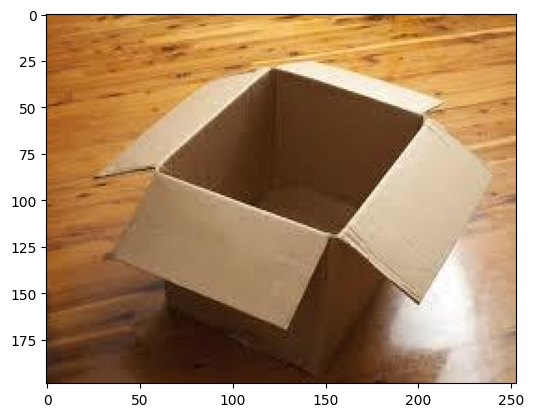

In [ ]:
predict_img('/content/drive/My Drive/images.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
plastic


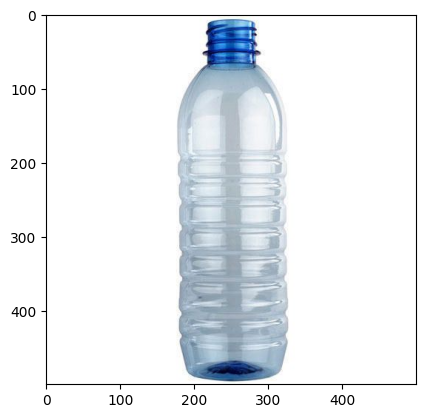

In [ ]:
predict_img('/content/drive/My Drive/bottle.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
white-glass


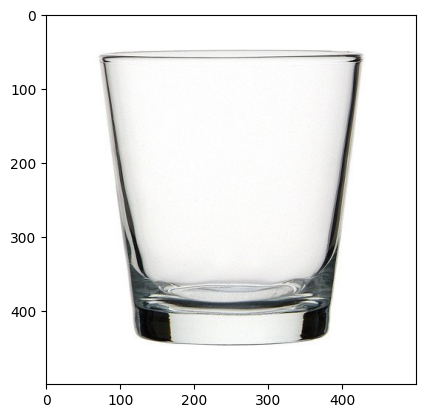

In [ ]:
predict_img('/content/drive/My Drive/glasses.jpg')